In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

1-Nearest-Neighbor train accuracy: 1.000  test accuracy: 0.775
2-Nearest-Neighbor train accuracy: 0.958  test accuracy: 0.775
3-Nearest-Neighbor train accuracy: 0.933  test accuracy: 0.825
4-Nearest-Neighbor train accuracy: 0.875  test accuracy: 0.838
5-Nearest-Neighbor train accuracy: 0.875  test accuracy: 0.838
6-Nearest-Neighbor train accuracy: 0.875  test accuracy: 0.825
7-Nearest-Neighbor train accuracy: 0.875  test accuracy: 0.838
8-Nearest-Neighbor train accuracy: 0.892  test accuracy: 0.850
9-Nearest-Neighbor train accuracy: 0.883  test accuracy: 0.825


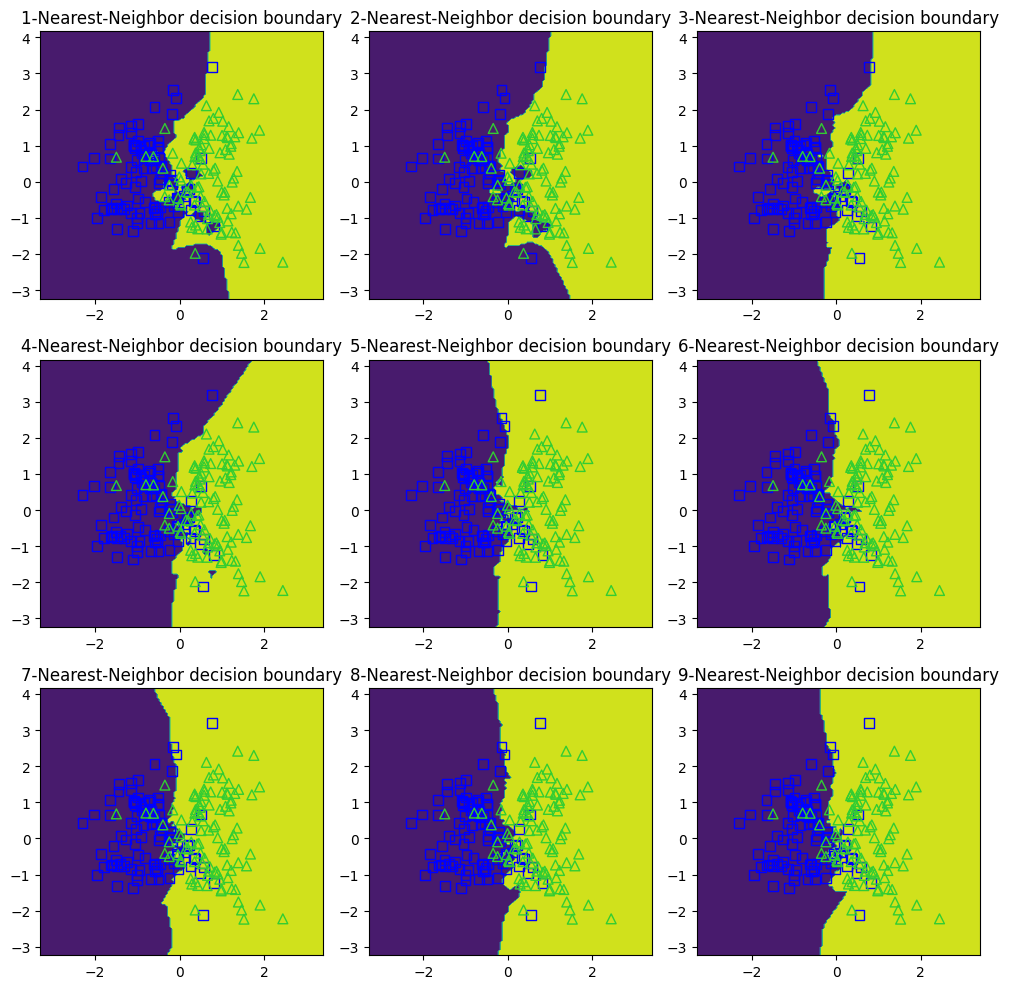

In [90]:
X, y = datasets.load_breast_cancer(return_X_y=True)
#X, y = datasets.make_moons(n_samples=100, noise=0.1, random_state=42)
X, y = datasets.make_classification(n_samples=200, n_features=3, n_informative=3, n_classes=2, n_redundant=0, n_clusters_per_class=4, random_state=42)

# Only use the first two features and normalize the data
X = X[:, [0,1]]

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the data
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)
X_scaled = sc.transform(X)

# Train k-nearest neighbors classifiers for k=1 to k=9
clfs = []
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    clfs.append(knn)

# Plot the decision boundaries
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
ax = ax.flatten()
h = 0.05
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_predict = np.c_[xx.ravel(), yy.ravel()]

for clf, name, a in zip(clfs, [f"{k}-Nearest-Neighbor" for k in range(1, 10)], ax):
    Z = clf.predict(X_predict).reshape(xx.shape)
    a.contourf(xx, yy, Z)
    a.set_title(f"{name} decision boundary")
    # Plot the misclassified test and training points
    print(
        f"{name} train accuracy: {np.mean(clf.predict(X_train_scaled) == y_train):.3f}"
        f"  test accuracy: {np.mean(clf.predict(X_test_scaled) == y_test):.3f}"
    )

# Plot the data
colors, markers = ["blue", "limegreen", "gray", "cyan"], "s^oxv<>"
for a in ax:
    for i in range(len(np.unique(y))):
        a.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], color=colors[i], marker=markers[i], s=50, facecolors="none")

fig.tight_layout()
plt.show()
